In [1]:
!pip install fastai2 nbdev pillow==6.2.0 kornia > /dev/null

In [2]:
from fastai2.basics import *
from fastai2.vision.widgets import *
from fastai2.vision.all import *

In [3]:
# visually cleaner list function

def ls_all(p):
    for x in p.ls():
        print(x)
        
Path.ls_all = ls_all

## dataset 1:
### source: https://www.kaggle.com/tawsifurrahman/covid19-radiography-database
added normally through kaggle

In [4]:
# path to data folder which will contain a subfolder for each dataset
path_data = Path('/root/.fastai/data')
path_data.mkdir(parents=True, exist_ok=True)
path_data

Path('/root/.fastai/data')

In [5]:
# ds1 stands for dataset 1
path_ds1 = Path('/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database')

# looking at the content we can see that there are separate folders for each label
path_ds1.ls_all()

/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/README.md.txt
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia.matadata.xlsx


In [6]:
# grouping data in single data folder
shutil.copytree(str(path_ds1), str(path_data/'ds1'))

'/root/.fastai/data/ds1'

## dataset 3:
### source: https://github.com/UCSD-AI4H/COVID-CT

added through git clone

In [7]:
!git clone https://github.com/UCSD-AI4H/COVID-CT

Cloning into 'COVID-CT'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4805 (delta 0), reused 2 (delta 0), pack-reused 4802
Receiving objects: 100% (4805/4805), 1.00 GiB | 41.10 MiB/s, done.
Resolving deltas: 100% (160/160), done.


In [8]:
!ls COVID-CT/

COVID-CT-MetaInfo.xlsx	Images-processed
CT_predict.py		NonCOVID-CT-MetaInfo.xlsx
Data-split		README for DenseNet_predict.md
DenseNet169		README.md


In [9]:
# grouping data in single data folder
!unzip COVID-CT/Images-processed/CT_NonCOVID.zip -d {path_data}/ds3
!unzip COVID-CT/Images-processed/CT_COVID.zip -d {path_data}/ds3

Archive:  COVID-CT/Images-processed/CT_NonCOVID.zip
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/0.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/1%0.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/1%1.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/1%2.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/10%0.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/10%1.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/10%2.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/102.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/1029.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/103.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/1030.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/104.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/1046.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/1047.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/1048.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/1049.png  
  inflating: 

  inflating: /root/.fastai/data/ds3/CT_NonCOVID/2145.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/22%0.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/22%1.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/2237.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/226.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/227.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/23.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/2341.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/24.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/25%0.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/25%1.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/25%2.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/25%3.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/25.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/26%0.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/26%1.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/26%2.jpg  
  inf

  inflating: /root/.fastai/data/ds3/CT_NonCOVID/705.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/706.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/709.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/71%0.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/71%1.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/72.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/73.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/74.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/75%0.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/75%1.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/753.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/754.png  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/76%0.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/76%1.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/76%2.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/77.jpg  
  inflating: /root/.fastai/data/ds3/CT_NonCOVID/78.jpg  
  inflating:

  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.09.20033118-p20-93%3.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.09.20033118-p20-93%3.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.07.20031393-p7-50%1.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.07.20031393-p7-50%1.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.07.20031393-p7-50%0.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.07.20031393-p7-50%0.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.09.20033118-p20-93%2.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.09.20033118-p20-93%2.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.02.22.20024927-p19-68%1.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.02.22.20024927-p19-68%1.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.04.20030395-p27-108%5.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.04.2

  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.22.20034041-p17-80-2.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.16.20036145-p19-128-1.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.16.20036145-p19-128-1.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.03.20030775-p12-93%1.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.03.20030775-p12-93%1.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.25.20037721-p27-172.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.25.20037721-p27-172.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.25.20043166-p17-78.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.25.20043166-p17-78.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/PIIS0140673620303603%2.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._PIIS0140673620303603%2.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.22.20040782-p24-1

  inflating: /root/.fastai/data/ds3/CT_COVID/bmj.m606.full-p4-22%1.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._bmj.m606.full-p4-22%1.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.11.20033159-p12-45%2.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.11.20033159-p12-45%2.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.22.20040782-p25-1546.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.22.20040782-p25-1546.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.02.25.20021568-p23-108%4.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.02.25.20021568-p23-108%4.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.20.20037325-p23-121.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.20.20037325-p23-121.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.02.27.20027557-p25-137%4.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.02.27.20027557-p2

  inflating: /root/.fastai/data/ds3/CT_COVID/Comparison-of-different-samples-for-2019-novel-cor_2020_International-Journa-p2-21%5.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._Comparison-of-different-samples-for-2019-novel-cor_2020_International-Journa-p2-21%5.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.02.28.20029025-p23-183.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.02.28.20029025-p23-183.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.04.20026005-p12-1946%1.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.04.20026005-p12-1946%1.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.12.20027185-p8-218.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.12.20027185-p8-218.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.02.25.20021568-p24-111%1.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.02.25.20021568-p24-111%1.png  
  inflating: /root/.fastai/data/d

  inflating: /root/.fastai/data/ds3/CT_COVID/2020.01.24.919183-p27-132.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.01.24.919183-p27-132.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.04.20030395-p27-108%8.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.04.20030395-p27-108%8.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.13.20035212-p23-160.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.13.20035212-p23-160.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.02.10.20021584-p6-52%12.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.02.10.20021584-p6-52%12.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.02.10.20021584-p6-52%13.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.02.10.20021584-p6-52%13.png  
  inflating: /root/.fastai/data/ds3/CT_COVID/2020.03.13.20035212-p23-161.png  
  inflating: /root/.fastai/data/ds3/__MACOSX/CT_COVID/._2020.03.13.20035

## "other" dataset
goal: prevent our model from learning that any category we actually care about (e.g. covid-19) is just "None of the other categories"

obtained by downloading random images (urls to those 491 images are in other-urls.txt) at https://github.com/deep-insights-ai/covid-19-classifier

In [10]:
# fastai has convenient functions to download all the images from our url file
path_other = download_images(url_file=Path('../input/other-urls/other-urls.txt'), dest=path_data/'other')
path_other

In [11]:
# it also have a function that finds all image files in a folder including its subfolders
fnames = get_image_files(path_data)
fnames

(#4139) [Path('/root/.fastai/data/ds3/CT_NonCOVID/38%1.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/705.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/1814.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/1845.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/579.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/1297.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/10%0.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/43%2.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/1261.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/177.png')...]

In [12]:
# downloading from a list of urls might have produced some corrupted images
bad_imgs = verify_images(fnames)
bad_imgs

(#213) [Path('/root/.fastai/data/ds3/CT_NonCOVID/38%1.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/10%0.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/43%2.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/83%1.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/38%0.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/83%0.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/37%2.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/39%5.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/54%0.jpg'),Path('/root/.fastai/data/ds3/CT_NonCOVID/54%2.jpg')...]

In [13]:
# deleting corrupted images (unlink deletes the files)
for img in bad_imgs:
    img.unlink()
    
# which means we have to look for all images again, this time there should be fewer
fnames = get_image_files(path_data)
fnames

(#3926) [Path('/root/.fastai/data/ds3/CT_NonCOVID/705.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/1814.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/1845.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/579.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/1297.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/1261.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/177.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/592.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/996.png'),Path('/root/.fastai/data/ds3/CT_NonCOVID/956.png')...]

In [14]:
# category names for our model to learn
cov = 'COVID-19'
pneumonia = 'PNEUMONIA'
normal = 'NORMAL' # healthy

# possible paths (different datasets in different paths require different labeling functions)
datasets = {'ds1', 'ds2', 'ds3', 'other'}

def label_func(p: Path) -> str: 
    """delegate classification to correct labeling function for that dataset"""
    
    # decide which dataset the file belongs to
    if p.parent.name in datasets:
        ds = p.parent.name
    elif p.parent.parent.name in datasets:
        ds = p.parent.parent.name  
    else:
        raise ValueError(f'label-func: could not find dataset classification in {p}')
    
    # delegate to the suitable labeling function
    if ds == 'ds1':
        return label_ds1(p)
    #elif ds == 'ds2':
     #   return label_ds2(p)
    elif ds == 'ds3':
        return label_ds3(p)
    else:
        return 'OTHER'


def label_ds1(p):
    # labeling for dataset 1
    if 'COVID-19' in p.name:
        return cov
    elif 'NORMAL' in p.name:
        return normal
    elif 'Pneumonia' in p.name:
        return pneumonia
    else:
        return 'UNDEFINED'


def label_ds2(p):    
    # labeling for dataset 2
    try:
        res = df_ds2.loc[str(p.name)]
        if res == 'COVID-19':
            return cov
        elif res == 'No Finding':
            return normal
        else:
            return pneumonia
    except KeyError:
        return 'UNDEFINED'


def label_ds3(p):
    lbl = p.parent.name
    if lbl == 'CT_COVID':
        return cov
    elif lbl == 'CT_NonCOVID':
        return normal
    else:
        raise ValueError(f'could not label {p} from dataset 3')

In [15]:
# sanity check: labeling our data should produce only our labels
set(fnames.map(label_func))

{'COVID-19', 'NORMAL', 'OTHER', 'PNEUMONIA'}

In [16]:
# looking at the distribution
Counter(fnames.map(label_func))

Counter({'NORMAL': 1579, 'COVID-19': 534, 'OTHER': 468, 'PNEUMONIA': 1345})

In [17]:
# as seen in the Counter, a single file was not labeled, so we just remove it
#def clean_fnames(fnames):
 #   for f in fnames:
  #      if label_func(f) == 'UNDEFINED':
   #         f.unlink()

In [18]:
#clean_fnames(fnames)

In [ ]:
def set_random_seed(seed):
    import torch

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    np.random.seed(seed)  # Numpy module.
    random.seed(seed)  # Python random module.
    torch.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

    # plus:
    # call DataLoader() with worker_init_fn=_init_fn
    # where:
    # def _init_fn(worker_id):
    #   np.random.seed(seed)

In [19]:
# creating our data for the model
db = DataBlock(get_items=get_image_files,
               get_y=label_func,
               blocks=(ImageBlock, CategoryBlock),
               item_tfms=Resize(224), # resizing to 224x224 pixel
               splitter=RandomSplitter(valid_pct=0.2, seed=42),
               batch_tfms=aug_transforms(max_warp=0.01, max_lighting=0.05)               
              )

In [20]:
dls = db.dataloaders(path_data)

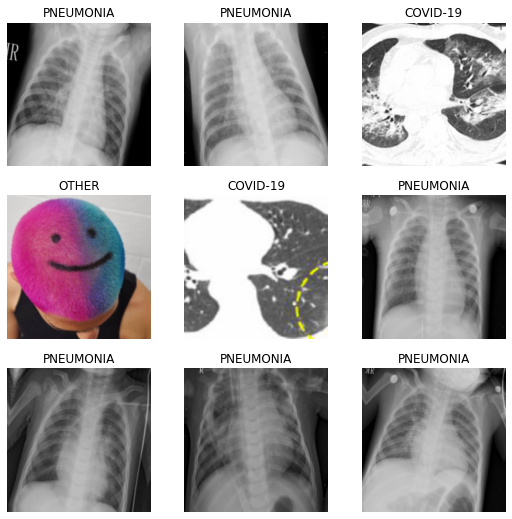

In [21]:
# looking at a mini-batch
dls.show_batch()

In [22]:
# getting a pre-trained model
learn = cnn_learner(dls, resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [23]:
# training the model
learn.fine_tune(18)

epoch,train_loss,valid_loss,accuracy,time
0,0.827320,0.238450,0.923567,01:00


KeyboardInterrupt: 

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

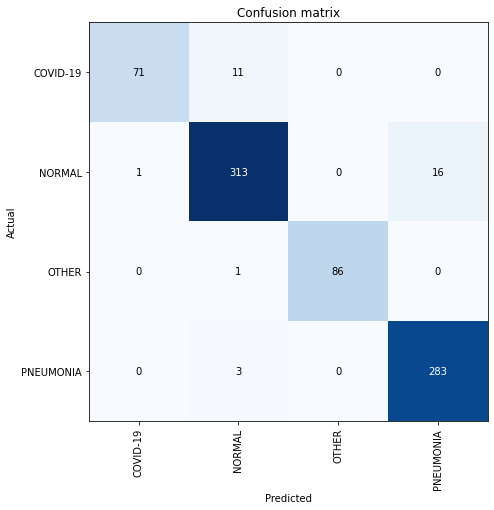

In [25]:
interp.plot_confusion_matrix(figsize=(7, 7))

In [26]:
learn.save('rn18-v-0.5')

In [27]:
learn.export('rn18-v-0.5-export.pkl')

AttributeError: Can't pickle local object 'combine_scheds.<locals>._inner'

## I feel lucky dataset
basically like the "other" dataset this one contains random images
but unlike "other" the model has never seen any of these before
theoretically all should be classified as "other"

In [ ]:
# sanity check, all these images should be classified as 'OTHER'
path_test = Path('/root/.fastai/test_ds')
download_images(url_file=Path('../input/sanity-check-dataset/i-feel-lucky-urls.txt'), dest=path_test)

In [ ]:
# this should give us a decent amount of random images
path_test.ls()

In [ ]:
results = []

In [ ]:
for img in path_test.ls():
    pred, idx, probs = learn.predict(img)
    results.append(pred)

In [ ]:
Counter(results)